# Case 14 Report (Raghevendran et al, 2004)

This report contains the results with case 14 simulations.

Paper: [*Phenotypic characterization of glucose repression mutants of Saccharomyces cerevisiae using experiments with 13 C-labelled glucose*](http://onlinelibrary.wiley.com/doi/10.1002/yea.1136/abstract)

**Abstract**
In the field of metabolic engineering and functional genomics, methods for analysis of
metabolic fluxes in the cell are attractive as they give an overview of the phenotypic
response of the cells at the level of the active metabolic network. This is unlike several
other high-throughput experimental techniques, which do not provide information
about the integrated response a specific genetic modification has on the cellular
function. In this study we have performed phenotypic characterization of several
mutants of the yeast Saccharomyces cerevisiae through the use of experiments with
13
C-labelled glucose. Through GC–MS analysis of the 13 C incorporated into the amino
acids of cellular proteins, it was possible to obtain quantitative information on the
function of the central carbon metabolism in the different mutants. Traditionally,
such labelling data have been used to quantify metabolic fluxes through the use of a
suitable mathematical model, but here we show that the raw labelling data may also
be used directly for phenotypic characterization of different mutant strains. Different
glucose derepressed strains investigated employed are the disruption mutants reg1,
hxk2, grr1, mig1 and mig1mig2 and the reference strain CEN.PK113-7D. Principal
components analysis of the summed fractional labelling data show that deleting the
genes HXK2 and GRR1 results in similar phenotype at the fluxome level, with a
partial alleviation of glucose repression on the respiratory metabolism. Furthermore,
deletion of the genes MIG1, MIG1/MIG2 and REG1 did not result in a significant
change in the phenotype at the fluxome level. 

**NOTES**
- From all the knockouts in this study ('REG1', 'MIG1', 'MIG2', 'GRR1', 'HXK2') only the latter had a gene correspondence in the model.



In [1]:
import warnings
from case_14 import *

pd.set_option('display.max_colwidth', -1)
warnings.filterwarnings('ignore')

#Initialization
case14 = Case14()
case14.model = case14.loadObjectFromFile('model_yeast_76.sav')
case14.model.solver = 'optlang-cplex'
case14.setMedium('MINIMAL')

genes = ['REG1', 'MIG1', 'MIG2', 'GRR1', 'HXK2'] #Knockouts in this study
HXK2 = case14.convertStdToSyst(genes)['HXK2'] # Gene match only for HXK2 gene



No correspondence in this model for gene REG1
No correspondence in this model for gene MIG1
No correspondence in this model for gene MIG2
No correspondence in this model for gene GRR1


No correspondence in this model for gene REG1
No correspondence in this model for gene MIG1
No correspondence in this model for gene MIG2
No correspondence in this model for gene GRR1


## General datasets


In [2]:
#General datasets
exp_dataset, reactions = case14.loadExperimentalRes('Results/Case 14/case14_experimental_fluxes.csv')
pd.DataFrame(reactions)


,Reaction
Yeast7_ID,
r_0534,D-Glucose(ex) <==> D-Glucose-6-phosphate
r_0962,Pyruvate <==> Phosphoenolpyruvate
r_0961,Pyruvate-mit + CoA <==> Acetyl-CoA-mit + CO2-mit
r_2131,Isocitrate <==> 2-Oxoglutarate + CO2-mit
r_0300,Citrate + CoA <==> Acetyl-CoA-mit + Oxaloacetate-mit
r_1022,Succinate-mit + CoA <==> Succinyl-CoA
r_0454,Succinate-mit <==> Fumarate
r_1054,D-Glyceraldehyde-3-phosphate <==> Glycerone-phosphate
r_0486,D-Glyceraldehyde-3-phosphate <==> 3-Phospho-D-glyceroyl-phosphate


# Wild Type


# Oxygen flux lb estimation


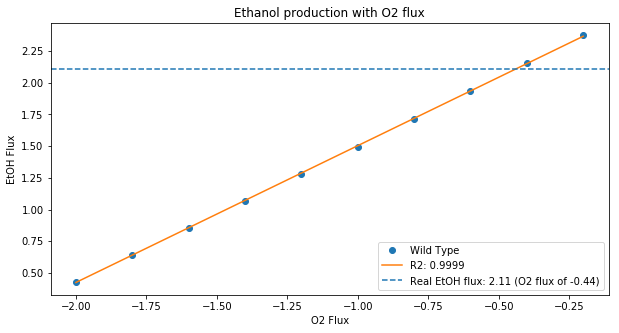

In [3]:
wt_etOH = case14.loadObjectFromFile('Results/Case 14/wt_dict_etOH_O2_fluxes.sav')
wt_o2_lb = case14.plotO2vsEtOH(wt_etOH, real_EtOH_flux = 2.1080, fname = 'Results/Case 14/wt_etOH_plot.png')


## Flux Balance Analysis (FBA) Simulation


In [4]:
wt_fba_res, wt_fba_exp_sim, wt_fba_exp_sim_errors = case14.simulationPipeline(exp_dataset.ix[:,0], o2_lb = wt_o2_lb, type = 'fba', res_exists = True, fname = 'Results/Case 14/res_fba_wt_case14.sav')
pd.concat([reactions, wt_fba_exp_sim_errors], axis = 1, join = 'inner')


,Reaction,wild type exp flux,Sim Flux,Abs Error,Rel Error
Yeast7_ID,,,,,
r_0534,D-Glucose(ex) <==> D-Glucose-6-phosphate,1.5000,1.500000,0.000000,0.000000e+00
r_0962,Pyruvate <==> Phosphoenolpyruvate,2.4723,-2.386246,4.858546,1.965193e+02
r_0961,Pyruvate-mit + CoA <==> Acetyl-CoA-mit + CO2-mit,0.0335,0.084671,0.051171,1.527493e+02
r_2131,Isocitrate <==> 2-Oxoglutarate + CO2-mit,0.0576,0.036987,0.020613,3.578645e+01
r_0300,Citrate + CoA <==> Acetyl-CoA-mit + Oxaloacetate-mit,0.0576,-0.050016,0.107616,1.868331e+02
r_1022,Succinate-mit + CoA <==> Succinyl-CoA,-0.0147,-0.000000,0.014700,1.000000e+02
r_0454,Succinate-mit <==> Fumarate,0.0147,-0.863682,0.878382,5.975387e+03
r_1054,D-Glyceraldehyde-3-phosphate <==> Glycerone-phosphate,-1.3246,-1.276162,0.048438,3.656807e+00
r_0486,D-Glyceraldehyde-3-phosphate <==> 3-Phospho-D-glyceroyl-phosphate,2.4938,2.570688,0.076888,3.083178e+00


<p style="float: center; font-size: 9pt; text-align: center; width: 80%;"><img src = "Results/Case 14/wt_fba_exp_sim_plot.png", width = 100%></p>

## Parsimonious Flux Balance Analysis (pFBA) Simulation


In [5]:
wt_pfba_res, wt_pfba_exp_sim, wt_pfba_exp_sim_errors = case14.simulationPipeline(exp_dataset.ix[:,0], o2_lb = wt_o2_lb, type = 'pfba', res_exists = True, fname = 'Results/Case 14/res_pfba_wt_case14.sav')
pd.concat([reactions, wt_pfba_exp_sim_errors], axis = 1, join = 'inner')


,Reaction,wild type exp flux,Sim Flux,Abs Error,Rel Error
Yeast7_ID,,,,,
r_0534,D-Glucose(ex) <==> D-Glucose-6-phosphate,1.5000,1.500000,0.000000,0.000000
r_0962,Pyruvate <==> Phosphoenolpyruvate,2.4723,-2.386288,4.858588,196.520963
r_0961,Pyruvate-mit + CoA <==> Acetyl-CoA-mit + CO2-mit,0.0335,0.084670,0.051170,152.746760
r_2131,Isocitrate <==> 2-Oxoglutarate + CO2-mit,0.0576,0.036987,0.020613,35.787095
r_0300,Citrate + CoA <==> Acetyl-CoA-mit + Oxaloacetate-mit,0.0576,-0.050015,0.107615,186.832244
r_1022,Succinate-mit + CoA <==> Succinyl-CoA,-0.0147,-0.000000,0.014700,100.000000
r_0454,Succinate-mit <==> Fumarate,0.0147,-0.000000,0.014700,100.000000
r_1054,D-Glyceraldehyde-3-phosphate <==> Glycerone-phosphate,-1.3246,-1.276089,0.048511,3.662316
r_0486,D-Glyceraldehyde-3-phosphate <==> 3-Phospho-D-glyceroyl-phosphate,2.4938,2.570617,0.076817,3.080335


<p style="float: center; font-size: 9pt; text-align: center; width: 80%;"><img src = "Results/Case 14/wt_pfba_exp_sim_plot.png", width = 100%></p>

## Flux Variability Analysis (FVA) Simulation


In [6]:
wt_fva_res, wt_fva_exp_sim, _ = case14.simulationPipeline(exp_dataset.ix[:,0], o2_lb = wt_o2_lb, type = 'fva', res_exists = True, fname = 'Results/Case 14/res_fva_wt_case14.sav')
pd.concat([reactions, wt_fva_exp_sim], axis = 1, join = 'inner')


,Reaction,wild type exp flux,maximum,minimum
Yeast7_ID,,,,
r_0534,D-Glucose(ex) <==> D-Glucose-6-phosphate,1.5000,1.500069,1.499953
r_0962,Pyruvate <==> Phosphoenolpyruvate,2.4723,-2.386392,-2.386159
r_0961,Pyruvate-mit + CoA <==> Acetyl-CoA-mit + CO2-mit,0.0335,0.084753,0.084572
r_2131,Isocitrate <==> 2-Oxoglutarate + CO2-mit,0.0576,0.037230,0.036135
r_0300,Citrate + CoA <==> Acetyl-CoA-mit + Oxaloacetate-mit,0.0576,-0.050085,-0.049992
r_1022,Succinate-mit + CoA <==> Succinyl-CoA,-0.0147,-0.000095,-0.000000
r_0454,Succinate-mit <==> Fumarate,0.0147,-0.863861,-0.000000
r_1054,D-Glyceraldehyde-3-phosphate <==> Glycerone-phosphate,-1.3246,-1.276357,-1.276016
r_0486,D-Glyceraldehyde-3-phosphate <==> 3-Phospho-D-glyceroyl-phosphate,2.4938,2.570887,2.570546


# HXK2 Knockout


# Oxygen flux lb estimation


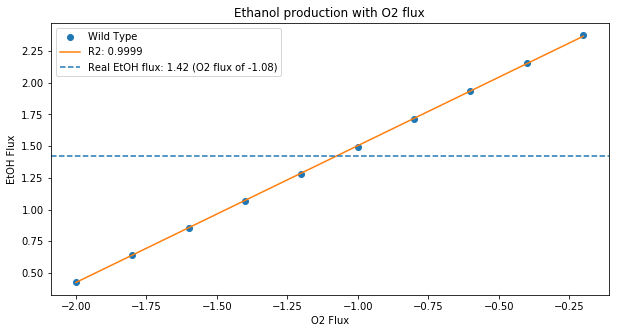

In [7]:
hxk2_etOH = case14.loadObjectFromFile('Results/Case 14/hxk2_dict_etOH_O2_fluxes.sav')
hxk2_02_lb = case14.plotO2vsEtOH(hxk2_etOH, real_EtOH_flux = 1.4221, fname = 'Results/Case 14/hxk2_etOH_plot.png')


## Flux Balance Analysis (FBA) Simulation


In [8]:
hxk2_fba_res, hxk2_fba_exp_sim, hxk2_fba_exp_sim_errors = case14.simulationPipeline(exp_dataset.ix[:,5], o2_lb = hxk2_02_lb, type = 'fba', res_exists = True, fname = 'Results/Case 14/res_fba_hxk2_case14.sav')
pd.concat([reactions, hxk2_fba_exp_sim_errors], axis = 1, join = 'inner')


,Reaction,HXK2 exp flux,Sim Flux,Abs Error,Rel Error
Yeast7_ID,,,,,
r_0534,D-Glucose(ex) <==> D-Glucose-6-phosphate,1.5000,1.500000,0.000000,0.000000e+00
r_0962,Pyruvate <==> Phosphoenolpyruvate,2.5154,-1.836244,4.351644,1.730001e+02
r_0961,Pyruvate-mit + CoA <==> Acetyl-CoA-mit + CO2-mit,0.7154,0.129610,0.585790,8.188293e+01
r_2131,Isocitrate <==> 2-Oxoglutarate + CO2-mit,0.7010,0.056618,0.644382,9.192331e+01
r_0300,Citrate + CoA <==> Acetyl-CoA-mit + Oxaloacetate-mit,0.0000,-0.076561,0.076561,inf
r_1022,Succinate-mit + CoA <==> Succinyl-CoA,-0.6462,-0.000000,0.646200,1.000000e+02
r_0454,Succinate-mit <==> Fumarate,0.6462,-2.129401,2.775601,4.295266e+02
r_1054,D-Glyceraldehyde-3-phosphate <==> Glycerone-phosphate,-1.2779,-1.202213,0.075687,5.922761e+00
r_0486,D-Glyceraldehyde-3-phosphate <==> 3-Phospho-D-glyceroyl-phosphate,2.5413,2.387686,0.153614,6.044708e+00


<p style="float: center; font-size: 9pt; text-align: center; width: 80%;"><img src = "Results/Case 14/hxk2_fba_exp_sim_plot.png", width = 100%></p>

## Parsimonious Flux Balance Analysis (pFBA) Simulation


In [9]:
hxk2_pfba_res, hxk2_pfba_exp_sim, hxk2_pfba_exp_sim_errors = case14.simulationPipeline(exp_dataset.ix[:,5], o2_lb = hxk2_02_lb, type = 'pfba', res_exists = True, fname = 'Results/Case 14/res_pfba_hxk2_case14.sav')
pd.concat([reactions, hxk2_pfba_exp_sim_errors], axis = 1, join = 'inner')


,Reaction,HXK2 exp flux,Sim Flux,Abs Error,Rel Error
Yeast7_ID,,,,,
r_0534,D-Glucose(ex) <==> D-Glucose-6-phosphate,1.5000,1.500000,0.000000,0.000000
r_0962,Pyruvate <==> Phosphoenolpyruvate,2.5154,-1.836307,4.351707,173.002595
r_0961,Pyruvate-mit + CoA <==> Acetyl-CoA-mit + CO2-mit,0.7154,0.129608,0.585792,81.883112
r_2131,Isocitrate <==> 2-Oxoglutarate + CO2-mit,0.7010,0.056617,0.644383,91.923394
r_0300,Citrate + CoA <==> Acetyl-CoA-mit + Oxaloacetate-mit,0.0000,-0.076561,0.076561,inf
r_1022,Succinate-mit + CoA <==> Succinyl-CoA,-0.6462,-0.000000,0.646200,100.000000
r_0454,Succinate-mit <==> Fumarate,0.6462,-0.000000,0.646200,100.000000
r_1054,D-Glyceraldehyde-3-phosphate <==> Glycerone-phosphate,-1.2779,-1.202101,0.075799,5.931501
r_0486,D-Glyceraldehyde-3-phosphate <==> 3-Phospho-D-glyceroyl-phosphate,2.5413,2.387577,0.153723,6.048979


<p style="float: center; font-size: 9pt; text-align: center; width: 80%;"><img src = "Results/Case 14/hxk2_pfba_exp_sim_plot.png", width = 100%></p>

## Flux Variability Analysis (FVA) Simulation


In [10]:
hxk2_fva_res, hxk2_fva_exp_sim, _ = case14.simulationPipeline(exp_dataset.ix[:,5], o2_lb = hxk2_02_lb, type = 'fva', res_exists = True, fname = 'Results/Case 14/res_fva_hxk2_case14.sav')
pd.concat([reactions, hxk2_fva_exp_sim], axis = 1, join = 'inner')


,Reaction,HXK2 exp flux,maximum,minimum
Yeast7_ID,,,,
r_0534,D-Glucose(ex) <==> D-Glucose-6-phosphate,1.5000,1.500105,1.499928
r_0962,Pyruvate <==> Phosphoenolpyruvate,2.5154,-1.836466,-1.836110
r_0961,Pyruvate-mit + CoA <==> Acetyl-CoA-mit + CO2-mit,0.7154,0.129734,0.129458
r_2131,Isocitrate <==> 2-Oxoglutarate + CO2-mit,0.7010,0.056989,0.055313
r_0300,Citrate + CoA <==> Acetyl-CoA-mit + Oxaloacetate-mit,0.0000,-0.076667,-0.076525
r_1022,Succinate-mit + CoA <==> Succinyl-CoA,-0.6462,-0.000145,-0.000000
r_0454,Succinate-mit <==> Fumarate,0.6462,-2.129676,-0.000000
r_1054,D-Glyceraldehyde-3-phosphate <==> Glycerone-phosphate,-1.2779,-1.202511,-1.201990
r_0486,D-Glyceraldehyde-3-phosphate <==> 3-Phospho-D-glyceroyl-phosphate,2.5413,2.387990,2.387469
